# Day 2 Open CV Tutorial
> Day 2 Open CV Tutorial

- toc: true 
- badges: true
- comments: true
- categories: [Computer Vision, Image Processing, OpenCV]
- image: images/chart-preview.png

In [4]:
import numpy as np
import cv2
#import argparse
import matplotlib.pyplot as plt

# construct the argument parse and parse the arguments
#ap.add_argument('--name', '-n', default='foo', help='foo')
ap = argparse.ArgumentParser(description='Fooo')
ap.add_argument("-i", "--image",
                default = "images/face_detection05.jpg", required=False,# for *.py use required= True
    help="path to input image")
#ap.add_argument("-p", "--prototxt", default = "/home/imagda/_coursera/pyimage/Day1/deep-learning-face-detection/deploy.prototxt.txt",
#    help="path to Caffe 'deploy' prototxt file")
#ap.add_argument("-m", "--model", default = "/home/imagda/_coursera/pyimage/Day1/deep-learning-face-detection/res10_300x300_ssd_iter_140000.caffemodel",#required=True,
#    help="path to Caffe pre-trained model")
#ap.add_argument("-c", "--confidence", type=float, default=0.20,
#    help="minimum probability to filter weak detections")
args = vars(ap.parse_args([])) #for *.py use args = vars(ap.parse_args())

## 1. Loading / Displaying an image

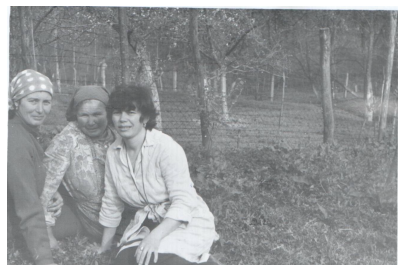

In [5]:
image = cv2.imread("images/face_detection05.jpg")#imread(args["image"])
(h, w, c) = image.shape
for i in range(1):    
    fig = plt.figure("My Image", figsize = (7, 5))
    ax = fig.add_subplot(111)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")    
    #plt.suptitle("My Image")

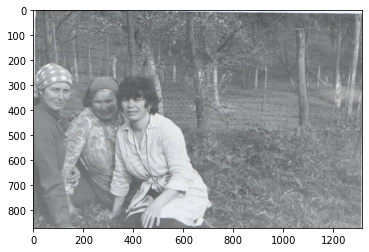

In [6]:
#cv2.imshow crashes jupyter notebook, but works fine on *.py files. Thefore I switch to using plt.imshow()
#cv2.imshow("Image", image)
#cv2.waitKey(0)
plt.imshow(image)

## 2. Accesing Individual Pixels

In [7]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=119, G=118, B=116


## 3. Array slicing/cropping
  
  - it is useful when extracting ROI (Region of Interest)

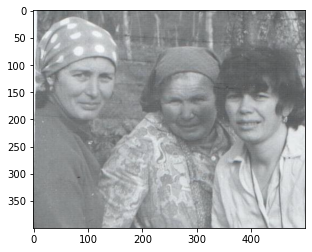

In [15]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[200:600, 0:500]
plt.imshow(roi)#cv2.imshow("ROI", roi)cv2.waitKey(0)

## 4. Resizing a image
 - In the case of deep learning, we often resize images, ignoring aspect ratio, so that the volume fits into a network which requires that an image be square and of a certain dimension.

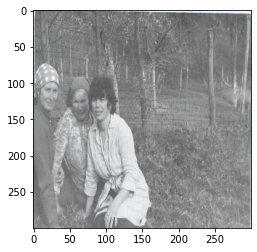

In [25]:
#Resize the image without considering the aspect-ratio
resized = cv2.resize(image, (300, 300))
plt.imshow(resized)

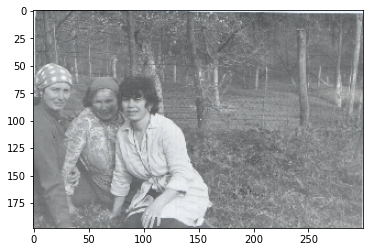

In [30]:
#Resize the image manatining the aspect-ratio. Produce 300  wide px, 
#and calculate new height based on aspect-ratio in original image.
r = 300.0 / w # ratio of old width /new width
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
plt.imshow(resized)

## 5. Rotating an image

  - Check imutils by pyimagesearch if you want to avoid croping the edges

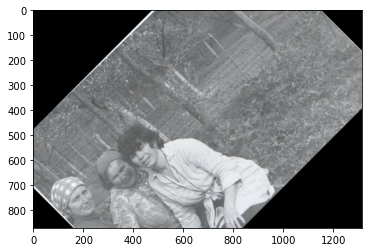

In [38]:
center = (w // 2, h // 2)
#Rotating an image about the center point requires that we first calculate the center (x, y)-coordinates of the image
#//to perform integer math
#rotate image 45 deg clockwise
M = cv2.getRotationMatrix2D(center, 45, 1.0)
#we warp the image using the matrix (effectively rotating it)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)
#cv2.imshow("OpenCV Rotation", rotated)
#cv2.waitKey(0)

## 6. Smoothing an image

- Bluring an image reduces high-frequency noise, making it easier for NN algorithms to detect and understand the actual contents of the image rather than just noise that will “confuse” our algorithms. 

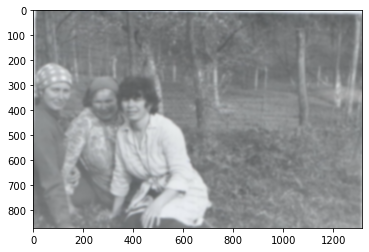

In [46]:
#bluring_kernel = (25,25)
# larger kernel will give blurrier image
blurred = cv2.GaussianBlur(image, (25, 25), 0)
plt.imshow(blurred)


## 6. Drawing on an image

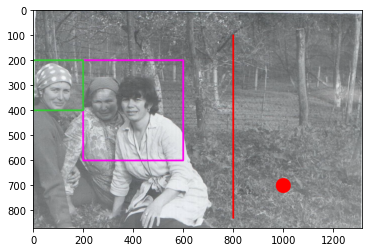

In [64]:
output = image.copy()
# output: image to be drawn on
# (x, y): top-left coordinates of rectangle
# (x, y): right-bottom coordinates of rectangle
cv2.rectangle(output, (200, 200), (600, 600), (255, 0, 240), 5)
cv2.rectangle(output, (0, 200), (200, 400), (50, 205, 50), 5)
cv2.circle(output, (1000, 700), 30, (255, 0, 0), -1)
cv2.line(output, (800, 830), (800, 100), (255, 0, 0), 5)
plt.imshow(output)

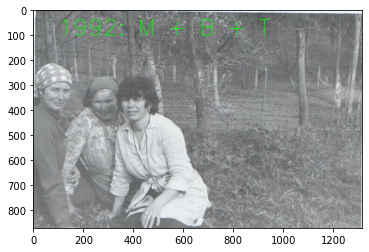

In [71]:
# draw green text on the image
output = image.copy()
FONT_SIZE = 3
COLOR = (0, 255, 0)
LINE_W = 2
LOC = (100, 100)
cv2.putText(output, "1992: M + B + T", LOC, 
    cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, COLOR, LINE_W)
plt.imshow(output)

## 7.Converting an image to grayscale

 - channels = 1
 - NN transform 1 channels to 3 for input in NN

In [105]:
new_image = "images/green.jpg"
image = cv2.imread(new_image)
norm = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

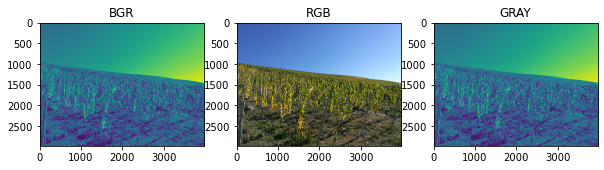

In [112]:
#collapse-hide
#collapse-output
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(131)
ax.set_title("BGR")
plt.imshow(image)
#plt.axis("off")
ax = fig.add_subplot(132)
plt.imshow(norm)
#plt.axis("off")
ax.set_title("RGB")
#plt.colorbar()
ax = fig.add_subplot(133)
ax.set_title("GRAY")
plt.imshow(gray)
#plt.axis("off")
#plt.colorbar()

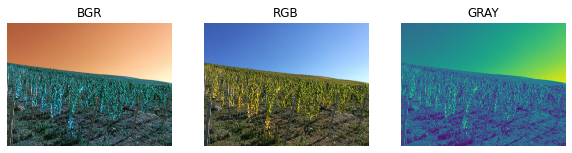

In [107]:
fig = plt.figure(figsize = (10,10))
images = ("BGR", image), ("RGB", norm), ("GRAY", gray)
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image) #,cmap = plt.cm.gray)
    plt.axis("off")

## 8. Perform edge detection

## 9. Thresholding a grayscale image

# References

> https https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/